<a href="https://colab.research.google.com/github/pawaniu/AdvancedNodeComplete/blob/master/nlp_try_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# execute one time - if run time get reset
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 

In [6]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# import libs
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

from gensim.utils import simple_preprocess

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
from gensim.models import CoherenceModel, HdpModel, LdaModel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>Question 1 - Perform EDA and necessary pre-processing steps in dataset</b>

Read the data from the csv file. And fetch first 5000 records in dataframe

In [8]:
data_df = pd.read_csv("uci-news-aggregator.csv",encoding='unicode_escape')
data_df = data_df.head(5000)

In [11]:
# EDA
data_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


Creating list of title collumn where we need to perform topic modeling

In [14]:
news_title = data_df.TITLE.values.tolist()

In [15]:
# Removeing the new line characters and single quotes
news_title = [re.sub('\S*@\S*\s?', '', sent) for sent in news_title]

In [16]:
# Remove new line characters
news_title = [re.sub('\s+', ' ', sent) for sent in news_title]

In [18]:
# Remove the unnecessary single qoutes in the list
news_title = [re.sub("\'", "", sent) for sent in news_title]

In [19]:
# display last 10 rows of news title
news_title[:10]

['Fed official says weak data caused by weather, should not slow taper',
 'Feds Charles Plosser sees high bar for change in pace of tapering',
 'US open: Stocks fall after Fed official hints at accelerated tapering',
 'Fed risks falling behind the curve, Charles Plosser says',
 'Feds Plosser: Nasty Weather Has Curbed Job Growth',
 'Plosser: Fed May Have to Accelerate Tapering Pace',
 'Feds Plosser: Taper pace may be too slow',
 'Feds Plosser expects US unemployment to fall to 6.2% by the end of 2014',
 'US jobs growth last month hit by weather:Fed President Charles Plosser',
 'ECB unlikely to end sterilisation of SMP purchases - traders']

In [20]:
# breaking connected words and removing special characters

news_title = [re.sub("-", " ", sent) for sent in news_title]
news_title = [re.sub("_", " ", sent) for sent in news_title]
news_title = [re.sub(":", "", sent) for sent in news_title]
news_title = [re.sub("_", " ", sent) for sent in news_title]
news_title = [re.sub("\.\.\.", "", sent) for sent in news_title]

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

news_words = list(sent_to_words(news_title))

In [23]:
# Build the bigram and trigram models and combine sentence in bigram and trigram

bigram = gensim.models.Phrases(news_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[news_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [223]:
def remove_stopwords(texts):
    print(stop_words)
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
# NLTK Stop words
import nltk;
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
additional_stop_words= ['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across', 'snl', 'get', 'say', 'new', 'pm','ex','s','get','io','m', 'let', 'st', 'hi', 'fi','after', 'afterwards','again','against', 'all', 'almost','alone','along',
'already','also','although','always','am','among','amongst','amoungst','amount','an','and','another','any','anyhow','anyone','anything','anyway','anywhere','are','around','as','at','back','be','became','because','become','becomes','becoming',
                        'been','before','beforehand','behind','being','below','beside','besides','between','beyond','bill','both','bottom','but','by','call','can','cannot','cant','co','con','could','couldnt','cry','de','describe','detail','do',
                        'done','down','due','during','each','eg','eight','either','eleven','else','elsewhere','empty','enough','etc','even','ever','every','everyone','everything','everywhere','except','few','fifteen','fifty','fill','find','fire',
                        'first','five','for','former','formerly','forty','found','four','from','front','full','further','get','give','go','had','has','hasnt','have','he','hence','her','here','hereafter','hereby','herein','hereupon','hers','herself',
                        'him','himself','his','how','however','hundred','i','ie','if','in','inc','indeed','interest','into','is','it','its','itself','keep','last','latter','latterly','least','less','ltd','made','many','may','me','meanwhile','might',
                        'mill','mine','more','moreover','most','mostly','move','much','must','my','myself','name','namely','neither','never','nevertheless','next','nine','no','nobody','none','noone','nor','not','nothing','now','nowhere','of','off','often',
                        'on','once','one','only','onto','or','other','others','otherwise','our','ours','ourselves','out','over','own','part','per','perhaps','please','put','rather','re','same','see','seem','seemed','seeming','seems','serious','several',
                        'she','should','show','side','since','sincere','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such','system','take','ten','than','that','the','their','them','themselves','then',
                        'thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','thick','thin','third','this','those','though','three','through','throughout','thru','thus','to','together','too','top','toward','towards',
                        'twelve','twenty','two','un','under','until','up','upon','us','very','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon','wherever','whether',
                        'which','while','whither','who','whoever','whole','whom','whose','why','will','with','within','without','would','yet','you','your','yours','yourself','yourselves']
stop_words.extend(additional_stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Create Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Question 2 - Using the LDA algorithm create the Topics (Min 10) for the Corpus

In [252]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:12]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('bake', 1), ('bank', 1), ('union', 1), ('work', 1)]]

In [254]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=42,
                                           update_every=11,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Question 3 - Compute the coherence score and print Topics Extracted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [233]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.677304749347881

Coherence Score:  0.5445156131497383


 Extracted Topics

In [255]:
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.076*"bachelor" + 0.067*"finale" + 0.028*"true_detective" + 0.027*"spoiler" + 0.021*"tax" + 0.020*"juan_pablo" + 0.016*"pick" + 0.013*"call" + 0.013*"reality" + 0.013*"rating"'),
 (1,
  '0.040*"miley_cyrus" + 0.031*"girl" + 0.022*"bankruptcy" + 0.022*"file" + 0.021*"watch" + 0.021*"word" + 0.019*"perform" + 0.018*"time" + 0.018*"scandal" + 0.017*"ban_bossy"'),
 (2,
  '0.048*"carney" + 0.034*"tanker" + 0.032*"libyan" + 0.030*"bank" + 0.023*"say" + 0.018*"oil" + 0.018*"bitcoin_exchange" + 0.015*"economy" + 0.014*"price" + 0.014*"escape"'),
 (3,
  '0.038*"stacy_keibl" + 0.026*"deposition" + 0.023*"s" + 0.021*"justin_bieber" + 0.018*"george_clooney" + 0.016*"tell" + 0.015*"public" + 0.014*"star" + 0.012*"secret" + 0.012*"prince_harry"'),
 (4,
  '0.024*"season" + 0.024*"video" + 0.017*"titanfall" + 0.016*"game" + 0.016*"throne" + 0.014*"taxis" + 0.012*"trailer" + 0.012*"live" + 0.011*"week" + 0.011*"launch"'),
 (5,
  '0.087*"stock" + 0.037*"market" + 0.030*"fall" + 0.025*"low" + 0.

Question - 4 Visualize the topics


In [257]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.366130  0.012094       1        1  30.045811
1     -0.034409  0.225766       2        1  10.423772
6     -0.004672 -0.018887       3        1  10.097529
3     -0.049170  0.148763       4        1   9.267280
0     -0.131363  0.027988       5        1   9.209519
5     -0.037146 -0.260994       6        1   8.911006
8     -0.042090 -0.036205       7        1   6.530297
9     -0.014282  0.031982       8        1   5.910222
2     -0.027583 -0.075888       9        1   5.050897
7     -0.025414 -0.054619      10        1   4.553667, topic_info=                Term        Freq       Total Category  logprob  loglift
18             stock  169.000000  169.000000  Default  30.0000  30.0000
2222        bachelor  153.000000  153.000000  Default  29.0000  29.0000
2224          finale  135.000000  135.000000  Default  28.0000  28.0000
2195     miley_cyrus   92.000000   92.000000  Default  27.0000  27.0000
1716              io   82.000000   82.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
3282  american_eagle   11.127321   44.560505  Topic10  -4.4891   1.7018
188             plan    8.967651   25.514329  Topic10  -4.7049   2.0436
29               hit    9.447350   50.263035  Topic10  -4.6528   1.4177
2754      neil_young    7.708487   73.293595  Topic10  -4.8562   0.8371
10              high    7.638429   66.446243  Topic10  -4.8654   0.9260

[419 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2000      7  0.959919         ad
597       3  0.943204        add
584       7  0.906390  agreement
435       3  0.952832      ahead
53        9  0.855112        aim
...     ...       ...        ...
710       6  0.694543      world
90        7  0.932986      worry
104       2  0.284252       year
104      10  0.697710       year
1969     10  0.908294      young

[478 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 7, 4, 1, 6, 9, 10, 3, 8])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [236]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [245]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


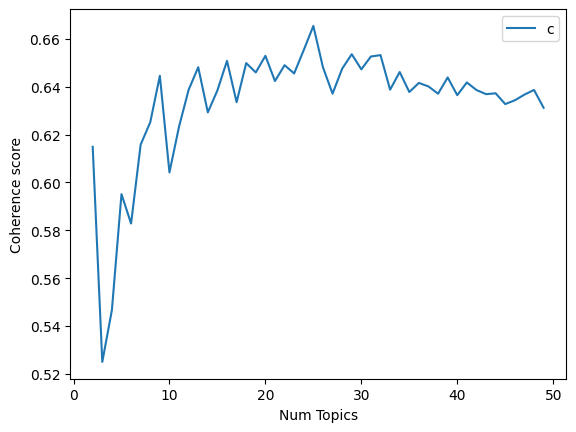

In [246]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Question 5 - Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable.

In [261]:
long_sentences = [sentence for sentence in df if len(sentence.split()) > 10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:141: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.

Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
